# Proj 1: Image interpolation
Implement image interpolation to small-size images.

Interpolate other small images to construct the large-size
image, and compare their difference.

In [113]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

(518, 584, 3)


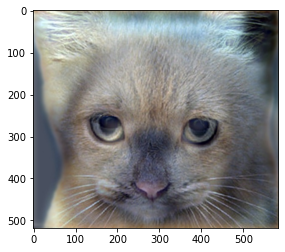

In [2]:
# load image
origin_img = io.imread('Proj1test.jpeg')
print(origin_img.shape)
# show origin image
plt.imshow(origin_img)
plt.show()

# 1.Nearest neighbor Interpolation

http://tech-algorithm.com/articles/nearest-neighbor-image-scaling/

https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation

In [3]:
def nearest_neighbor_interpolation(img, ow, oh):
    '''
    img: origin input image
    ow, oh: represents scaled width and height respectively
    '''
    # height and width of the input img
    h, w = img.shape[0], img.shape[1]
    # enlarged image with rgb channel
    out_img = np.zeros(shape=(oh, ow, 3), dtype='uint8')
    # scale factor
    s_h, s_w = (h * 1.0) / oh, (w * 1.0) / ow
    # insert pixel to the new img
    for i in range(oh):
        # i in height
        for j in range(ow):
            # int function realize round-down
            out_img[i, j] = img[int(i*s_h), int(j*s_w)]
    return out_img

def nearest_neighbor_interpolation_by_scale_factor(img, fw, fh):
    '''
    img: origin input image
    fw, fh: represents scale factor of width and height respectively
    '''
    oh, ow = fh * img.shape[0], fw * img.shape[1]
    return nearest_neighbor_interpolation(img, ow, oh)

In [106]:
# implement interpolation to enlarge image x2, x4 respectively
img_nni_x2 = nearest_neighbor_interpolation_by_scale_factor(origin_img, 2, 2)
img_nni_x4 = nearest_neighbor_interpolation_by_scale_factor(origin_img, 4, 4)

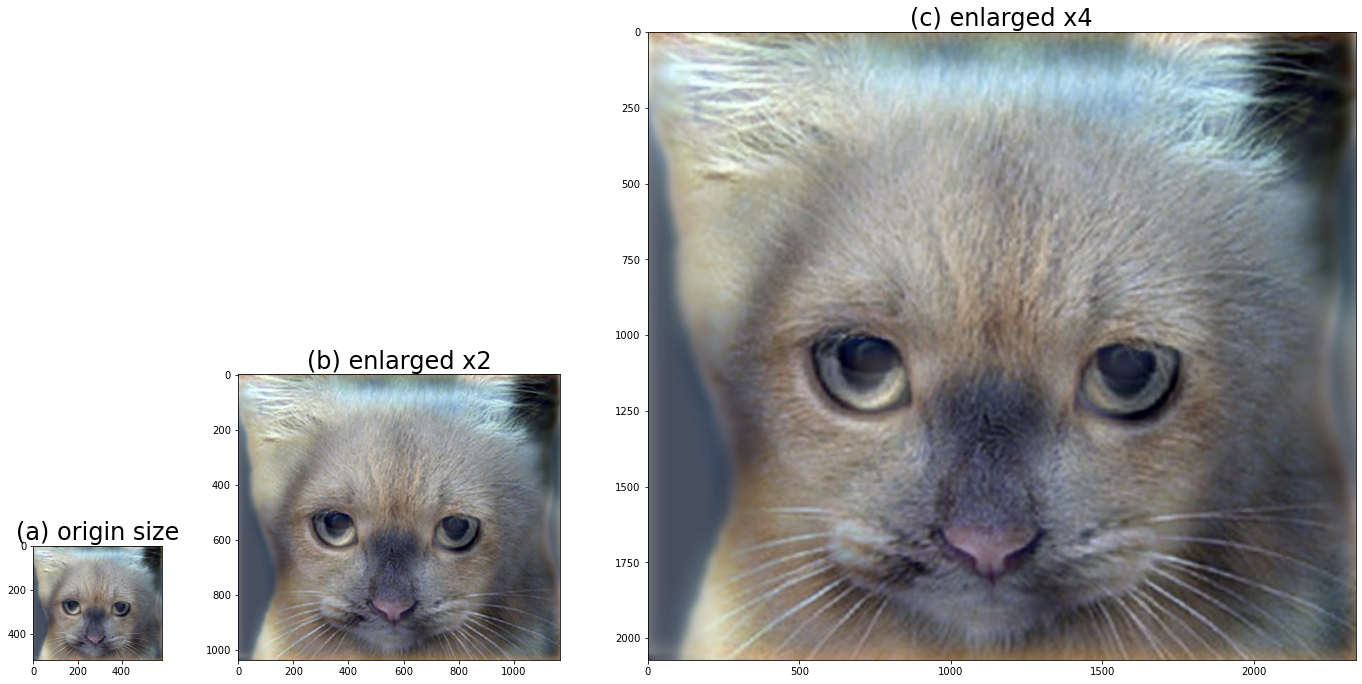

In [107]:
fig = plt.figure(figsize=(24, 21))
gs = fig.add_gridspec(
    7, 7,
    #left=0.1, right=0.9, bottom=0.1, top=0.9,
    wspace=0.5, hspace=0.5
)

ax0 = fig.add_subplot(gs[6, 0])
ax1 = fig.add_subplot(gs[5:, 1:3])
ax2 = fig.add_subplot(gs[3:, 3:])
ax0.imshow(origin_img)
ax0.set_title('(a) origin size', fontdict={'fontsize': 24})
ax1.imshow(img_nni_x2)
ax1.set_title('(b) enlarged x2', fontdict={'fontsize': 24})
ax2.imshow(img_nni_x4)
ax2.set_title('(c) enlarged x4', fontdict={'fontsize': 24})
# save the result
plt.savefig("nearest_neighbor_result.png", bbox_inches='tight', pad_inches=0)  # dpi=300)
plt.show()

# 2.Bilinear interpolation

https://en.wikipedia.org/wiki/Bilinear_interpolation

In [110]:
def bilinear_interpolation(img, ow, oh):
    '''
    img: origin input image
    ow, oh: represents scaled width and height respectively
    '''
    # height and width of the input img
    h, w = img.shape[0], img.shape[1]
    # scale factor
    s_h, s_w = (h * 1.0) / oh, (w * 1.0) / ow
    # enlarged image with rgb channel
    out_img = np.zeros((oh, ow, 3), dtype=np.uint8)

    # 对 height 循环
    for dst_y in range(oh):
        # 对 width 循环
        for dst_x in range(ow):
            # 目标在源上的坐标
            src_x = dst_x * s_w
            src_y = dst_y * s_h
            # calculate the positions of the 4 nearest neighbors on the source map
            i = int(np.floor(src_x))
            j = int(np.floor(src_y))
            u = src_x-i
            v = src_y-j
            if j == h-1:
                j = h-2
            if i == w-1:
                i = w-2
            out_img[dst_y, dst_x] = (1-u)*(1-v)*img[j, i] + u*(1-v)*img[j+1, i] + \
            (1-u)*v*img[j, i+1] + u*v*img[j+1, i+1]
    return out_img

In [111]:
img_bi_x2 = bilinear_interpolation(origin_img, origin_img.shape[1]*2, origin_img.shape[0]*2)
img_bi_x4 = bilinear_interpolation(origin_img, origin_img.shape[1]*4, origin_img.shape[0]*4)

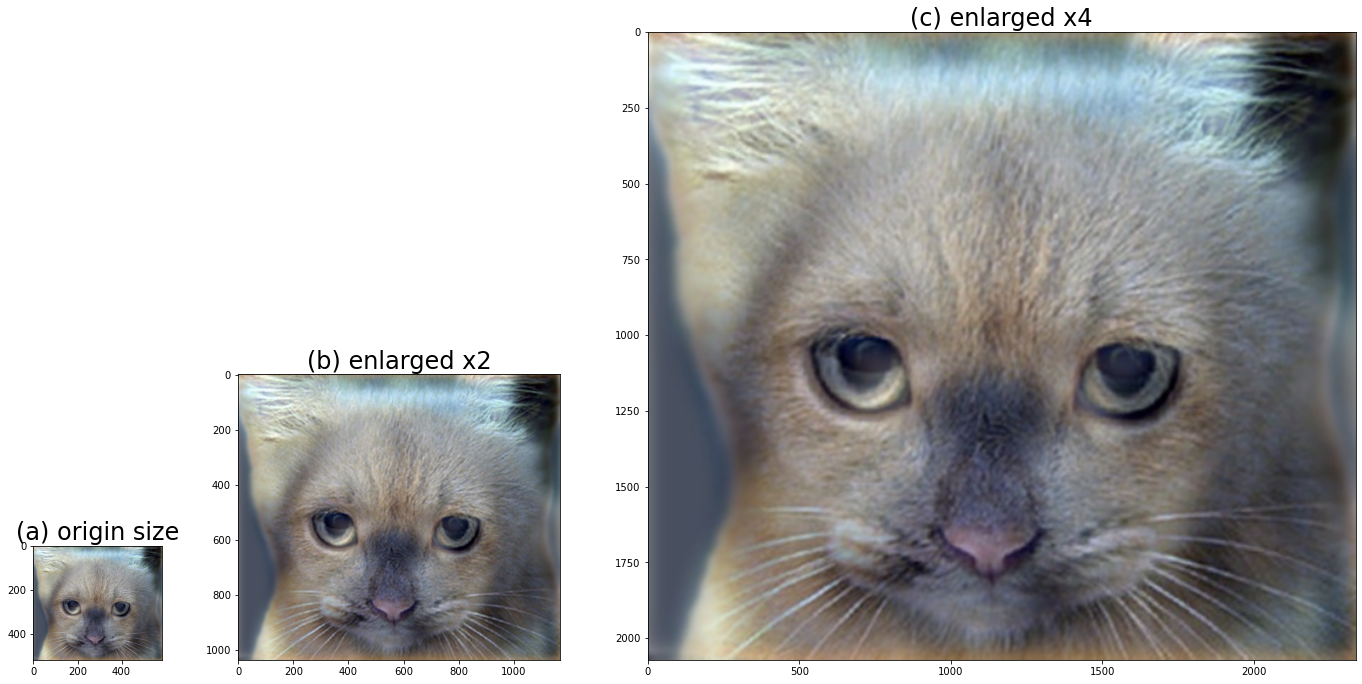

In [112]:
fig = plt.figure(figsize=(24, 21))
gs = fig.add_gridspec(
    7, 7,
    #left=0.1, right=0.9, bottom=0.1, top=0.9,
    wspace=0.5, hspace=0.5
)

ax0 = fig.add_subplot(gs[6, 0])
ax1 = fig.add_subplot(gs[5:, 1:3])
ax2 = fig.add_subplot(gs[3:, 3:])
ax0.imshow(origin_img)
ax0.set_title('(a) origin size', fontdict={'fontsize': 24})
ax1.imshow(img_bi_x2)
ax1.set_title('(b) enlarged x2', fontdict={'fontsize': 24})
ax2.imshow(img_bi_x4)
ax2.set_title('(c) enlarged x4', fontdict={'fontsize': 24})
# save the result
plt.savefig("bilinear_interpolation_result.png", bbox_inches='tight', pad_inches=0)  # dpi=300)
plt.show()

# 3.Bilinear interpolation

https://docs.opencv.org/4.6.0/da/d54/group__imgproc__transform.html#gga5bb5a1fea74ea38e1a5445ca803ff121a55e404e7fa9684af79fe9827f36a5dc1

In [114]:
img_ci_x2 = cv.resize(origin_img, (origin_img.shape[1]*2, origin_img.shape[0]*2), interpolation=cv.INTER_CUBIC)
img_ci_x4 = cv.resize(origin_img, (origin_img.shape[1]*4, origin_img.shape[0]*4), interpolation=cv.INTER_CUBIC)

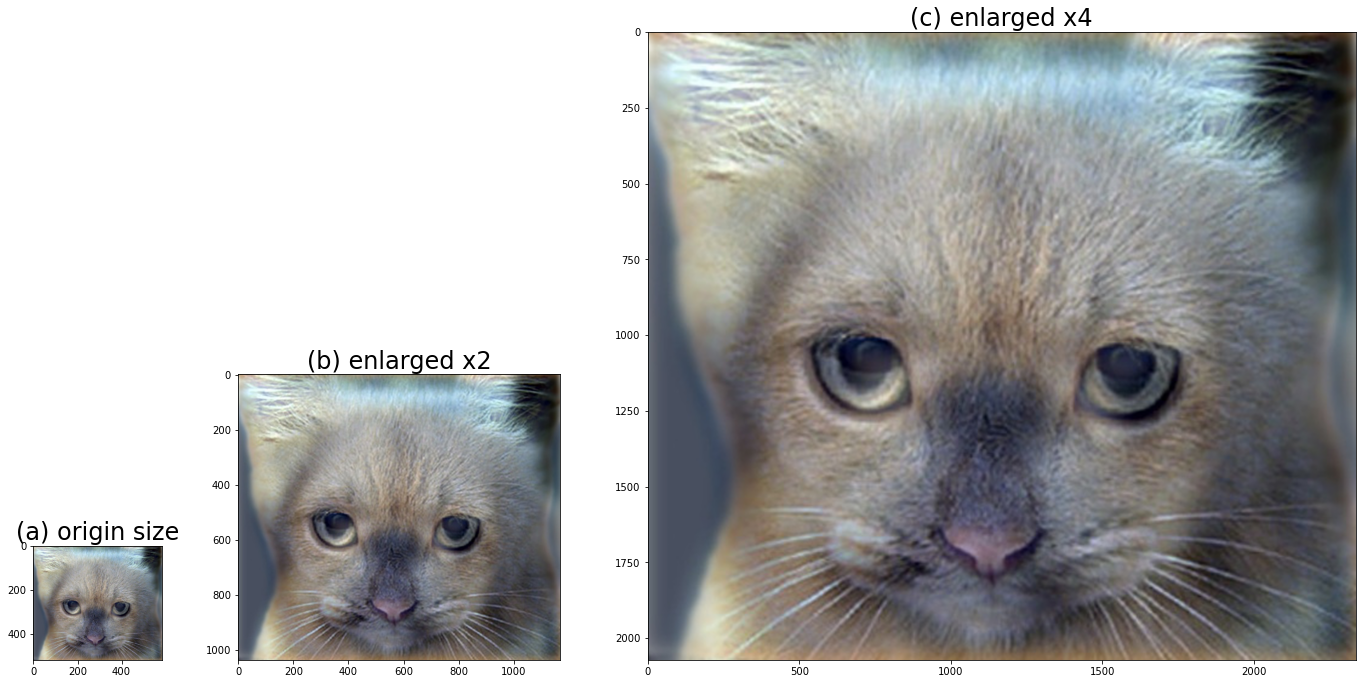

In [115]:
fig = plt.figure(figsize=(24, 21))
gs = fig.add_gridspec(
    7, 7,
    #left=0.1, right=0.9, bottom=0.1, top=0.9,
    wspace=0.5, hspace=0.5
)

ax0 = fig.add_subplot(gs[6, 0])
ax1 = fig.add_subplot(gs[5:, 1:3])
ax2 = fig.add_subplot(gs[3:, 3:])
ax0.imshow(origin_img)
ax0.set_title('(a) origin size', fontdict={'fontsize': 24})
ax1.imshow(img_ci_x2)
ax1.set_title('(b) enlarged x2', fontdict={'fontsize': 24})
ax2.imshow(img_ci_x4)
ax2.set_title('(c) enlarged x4', fontdict={'fontsize': 24})
# save the result
plt.savefig("bicubic_interpolation_result.png", bbox_inches='tight', pad_inches=0)  # dpi=300)
plt.show()

# Summary

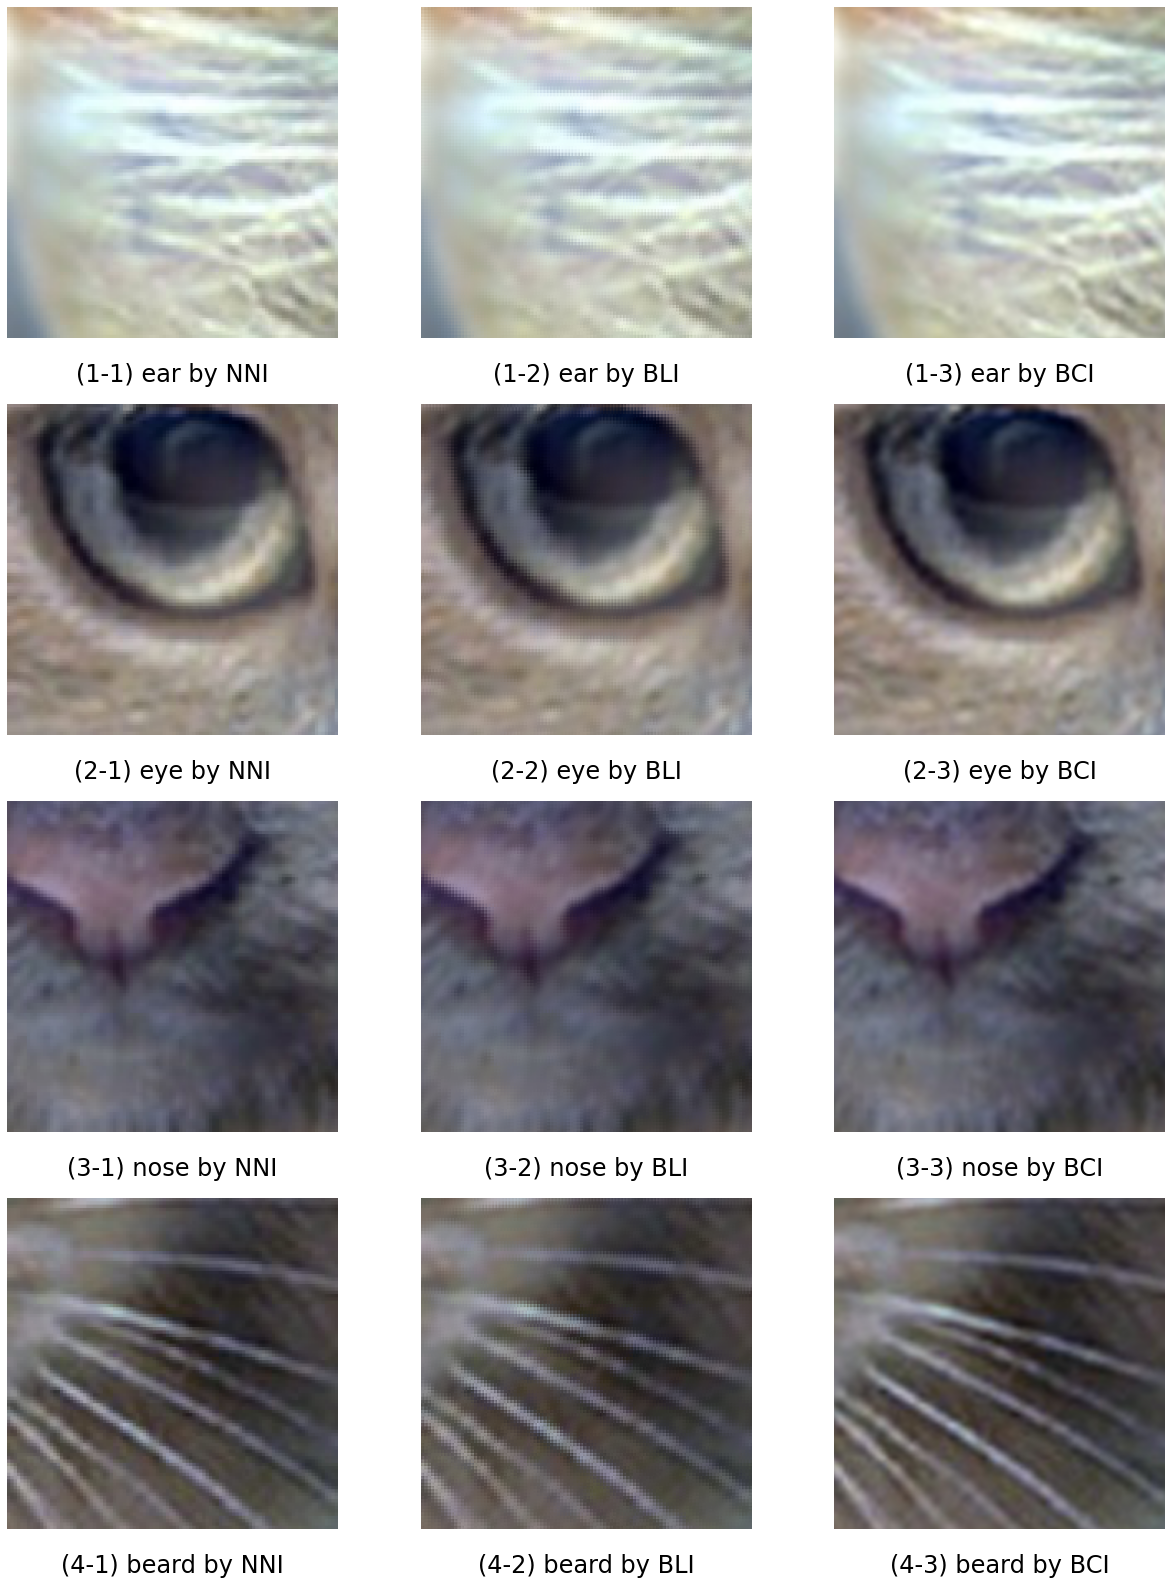

In [141]:
fig, axs = plt.subplots(nrows=4, ncols=3, constrained_layout=False)
fig.set_size_inches(21, 28)

part_list = ['ear', 'eye', 'nose', 'beard']

axs[0, 0].imshow(img_nni_x4[0:400, 0:400])
axs[0, 0].set_axis_off()
axs[0, 0].set_title('(1-1) ear by NNI', y=-0.15, fontdict={'fontsize': 24})
axs[1, 0].imshow(img_nni_x4[1000:1400, 500:900])
axs[1, 0].set_axis_off()
axs[1, 0].set_title('(2-1) eye by NNI', y=-0.15, fontdict={'fontsize': 24})
axs[2, 0].imshow(img_nni_x4[1600:2000, 1000:1400])
axs[2, 0].set_axis_off()
axs[2, 0].set_title('(3-1) nose by NNI', y=-0.15, fontdict={'fontsize': 24})
axs[3, 0].imshow(img_nni_x4[1600:2000, 1600:2000])
axs[3, 0].set_axis_off()
axs[3, 0].set_title('(4-1) beard by NNI', y=-0.15, fontdict={'fontsize': 24})

axs[0, 1].imshow(img_bi_x4[0:400, 0:400])
axs[0, 1].set_axis_off()
axs[0, 1].set_title('(1-2) ear by BLI', y=-0.15, fontdict={'fontsize': 24})
axs[1, 1].imshow(img_bi_x4[1000:1400, 500:900])
axs[1, 1].set_axis_off()
axs[1, 1].set_title('(2-2) eye by BLI', y=-0.15, fontdict={'fontsize': 24})
axs[2, 1].imshow(img_bi_x4[1600:2000, 1000:1400])
axs[2, 1].set_axis_off()
axs[2, 1].set_title('(3-2) nose by BLI', y=-0.15, fontdict={'fontsize': 24})
axs[3, 1].imshow(img_bi_x4[1600:2000, 1600:2000])
axs[3, 1].set_axis_off()
axs[3, 1].set_title('(4-2) beard by BLI', y=-0.15, fontdict={'fontsize': 24})

axs[0, 2].imshow(img_ci_x4[0:400, 0:400])
axs[0, 2].set_axis_off()
axs[0, 2].set_title('(1-3) ear by BCI', y=-0.15, fontdict={'fontsize': 24})
axs[1, 2].imshow(img_ci_x4[1000:1400, 500:900])
axs[1, 2].set_axis_off()
axs[1, 2].set_title('(2-3) eye by BCI', y=-0.15, fontdict={'fontsize': 24})
axs[2, 2].imshow(img_ci_x4[1600:2000, 1000:1400])
axs[2, 2].set_axis_off()
axs[2, 2].set_title('(3-3) nose by BCI', y=-0.15, fontdict={'fontsize': 24})
axs[3, 2].imshow(img_ci_x4[1600:2000, 1600:2000])
axs[3, 2].set_axis_off()
axs[3, 2].set_title('(4-3) beard by BCI', y=-0.15, fontdict={'fontsize': 24})

# save the result
plt.savefig("summary_comparision.png", bbox_inches='tight', pad_inches=0)
plt.show()